In [39]:
import os
import pandas as pd
import pickle
import ast
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from dataset import DataSet
import plotly.graph_objects as go
from matplotlib.colors import ListedColormap


In [40]:
def make_pretty(ax, title='', x_label='', y_label='', img=False):
    ax.set_title(title, fontsize=20)
    ax.set_xlabel(x_label, fontsize=16)
    ax.set_ylabel(y_label, fontsize=16)
    ax.legend(loc='best', fontsize=16)
    if img:
        ax.axis('off')
        
    return ax

In [41]:
final_df = DataSet().final_customer_df

In [42]:
# COMMENTED OUT CODE WAS FOR THE OLD
"""directory = "/home/arneyh/scotforgeproject1/results_csvs/"
files = os.listdir(directory)
csv_files = [file for file in files if file.endswith(".csv")]

dfs = []

# Put all csvs in the results_csv folder into one DataFrame
for file in csv_files:
    df = pd.read_csv(os.path.join(directory, file))
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)"""


directory = "/home/arneyh/scotforgeproject1/new_results_csv/"
combined_df = pd.read_csv(directory + "models_to_analyze.csv")
combined_df = combined_df.sort_values(by='silhouette_score', ascending=False)

In [43]:
combined_df = combined_df.sort_values(by='silhouette_score', ascending=False)
combined_df.reset_index(inplace=True, drop=True)

columns_to_keep = ['labels', 'hyperparameters', 'silhouette_score', 'features']
combined_df = combined_df[columns_to_keep]
combined_df.head(-1)

,labels,hyperparameters,silhouette_score,features
0,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.3, 'min_samples': 10}",0.907322,"['Credit Limit', 'Salesperson', 'Quote Speed',..."
1,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.3, 'min_samples': 7}",0.907322,"['Credit Limit', 'Salesperson', 'Quote Speed',..."
2,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.3, 'min_samples': 10}",0.907035,"['Credit Limit', 'Salesperson', 'Quote Speed']"
3,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.3, 'min_samples': 7}",0.907035,"['Credit Limit', 'Salesperson', 'Quote Speed']"
4,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.2, 'min_samples': 3}",0.888140,"['Credit Limit', 'Salesperson', 'Quote Speed',..."
...,...,...,...,...
99,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.3, 'min_samples': 10}",0.805386,"['Salesperson', 'Quote Speed', 'Material Densi..."
100,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.1, 'min_samples': 10}",0.805090,"['Material Density', 'Total Order Price', 'Tot..."
101,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.1, 'min_samples': 10}",0.804985,"['Material Density', 'MRR Serial Count', 'Tota..."
102,b'\x80\x03cnumpy.core.multiarray\n_reconstruct...,"{'eps': 0.3, 'min_samples': 7}",0.804776,"['Salesperson', 'Quote Speed', 'Material Densi..."


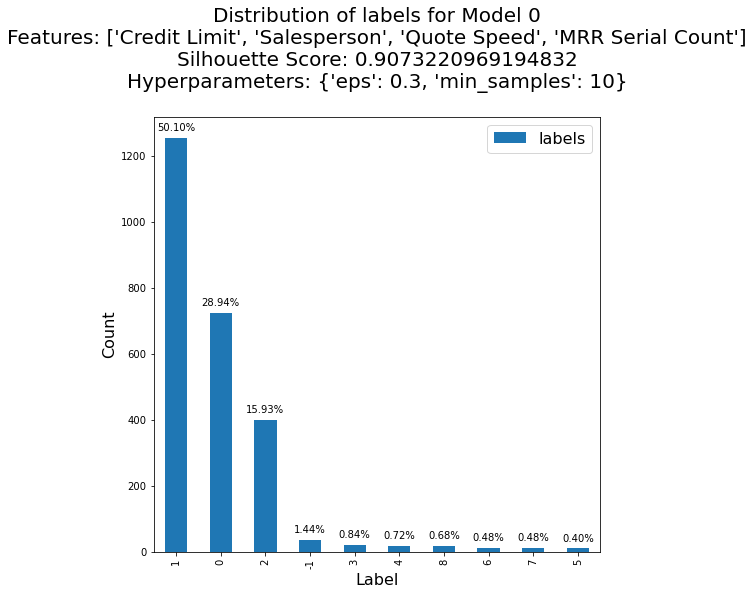

Error occurred for row 21: EOL while scanning string literal (<unknown>, line 1)
Error occurred for row 32: EOL while scanning string literal (<unknown>, line 1)
Error occurred for row 37: EOL while scanning string literal (<unknown>, line 1)
Error occurred for row 43: EOL while scanning string literal (<unknown>, line 1)
Error occurred for row 98: EOL while scanning string literal (<unknown>, line 1)
Error occurred for row 104: EOL while scanning string literal (<unknown>, line 1)


In [44]:
count = 0
for i, row in combined_df.iterrows():
    try:
        labels = pickle.loads(ast.literal_eval(combined_df['labels'].loc[i]))
        df = pd.DataFrame(columns=['labels'])
        df['labels'] = labels
        
        largest_cluster_percentage = df['labels'].value_counts(normalize=True).max() * 100
        silhouette_score = combined_df['silhouette_score'].loc[i]

        features = combined_df['features'].loc[i]
        features_list = features.split(', ')
        # ADD THIS LINE TO THE FOLLOWING IF STATEMENT IF YOU ONLY WANT TO SEE GRAPHS WITH TWO FEATURES:
        # and len(features_list) == 2

        # GET RID OF COUNT IN IF STATEMENT IF YOU WANT TO SEE ALL GRAPHS
        if silhouette_score > 0.8 and largest_cluster_percentage < 95 and count < 1:
            plt.figure(figsize=(8, 8))
            ax = df['labels'].value_counts().plot(kind='bar')
            features = combined_df['features'].loc[i]
            silhouette_score = combined_df['silhouette_score'].loc[i]
            hyperparameters = combined_df['hyperparameters'].loc[i]
            make_pretty(ax, f'Distribution of labels for Model {i}\nFeatures: {features}\nSilhouette Score: {silhouette_score}\nHyperparameters: {hyperparameters}\n', 'Label', 'Count')
            #plt.title(f'Distribution of labels for Model {i}\nFeatures: {features}\nSilhouette Score: {silhouette_score}\nHyperparameters: {hyperparameters}')
            #plt.xlabel('Label')
            #plt.ylabel('Count')
            for p in ax.patches:
                ax.annotate(f'{p.get_height() / len(df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
            plt.show()

            count += 1
    except Exception as e:
        print(f"Error occurred for row {i}: {e}")
        #print(row)
        #print()

### Checking if any Birch Models exist

In [45]:
for index, row in combined_df.iterrows():
    # Check if "threshold" is contained in the hyperparameters of the current row
    if not pd.isnull(row['hyperparameters']):
        hyperparameters_dict = ast.literal_eval(row['hyperparameters'])
        
        # IF THIS IS EMPTY BIRCH MODELS DON'T EXIST
        if 'threshold' in hyperparameters_dict and hyperparameters_dict != "nan":
            print("Row containing 'threshold':")
            print(row)
            print()  


No BIRCH

:(

### Plotting Bar Charts of most used features in the models_to_analyze csv

No handles with labels found to put in legend.


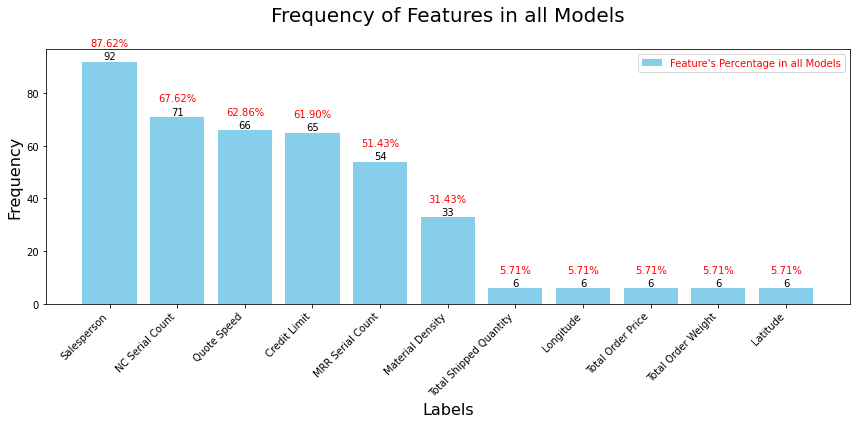

In [46]:
labels = []
for features_str in combined_df['features']:
    if isinstance(features_str, str) and features_str != "nan":
        features_list = ast.literal_eval(features_str)
        labels.extend(features_list)

# Counting occurrences of each label
label_counts = {}
for label in labels:
    if label in label_counts:
        label_counts[label] += 1
    else:
        label_counts[label] = 1

label_counts = dict(sorted(label_counts.items(), key=lambda item: item[1], reverse=True))

fig, ax = plt.subplots(figsize=(12, 6))
make_pretty(ax, 'Frequency of Features in all Models\n', 'Labels', 'Frequency')
bars = ax.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

total_rows = len(combined_df)

# Adds numbers of count on top of bars
for bar in bars:
    height = bar.get_height()
    label_percentage = (height / total_rows) * 100
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 5, '%.2f%%' % label_percentage, ha='center', va='bottom', color='red')

legend = plt.legend(["Feature's Percentage in all Models"], loc='upper right')
for text in legend.get_texts():
    text.set_color('red')
plt.show()


# Plotting Cluster Maps of two specific Models

## Model 46 - 2 features

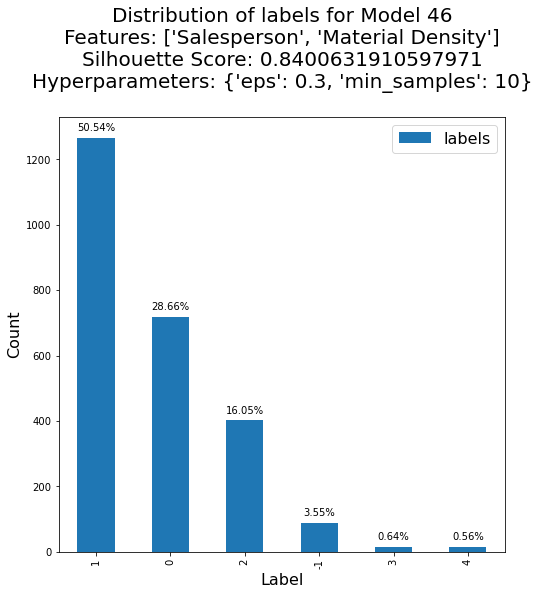

In [47]:
# Get data for Model 46
row_46 = combined_df.loc[46]
labels = pickle.loads(ast.literal_eval(row_46['labels']))
df = pd.DataFrame(columns=['labels'])
df['labels'] = labels

# Plot the data
plt.figure(figsize=(8, 8))
ax = df['labels'].value_counts().plot(kind='bar')
features = row_46['features']
silhouette_score = row_46['silhouette_score']
hyperparameters = row_46['hyperparameters']
make_pretty(ax, f'Distribution of labels for Model 46\nFeatures: {features}\nSilhouette Score: {silhouette_score}\nHyperparameters: {hyperparameters}\n', 'Label', 'Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

No handles with labels found to put in legend.


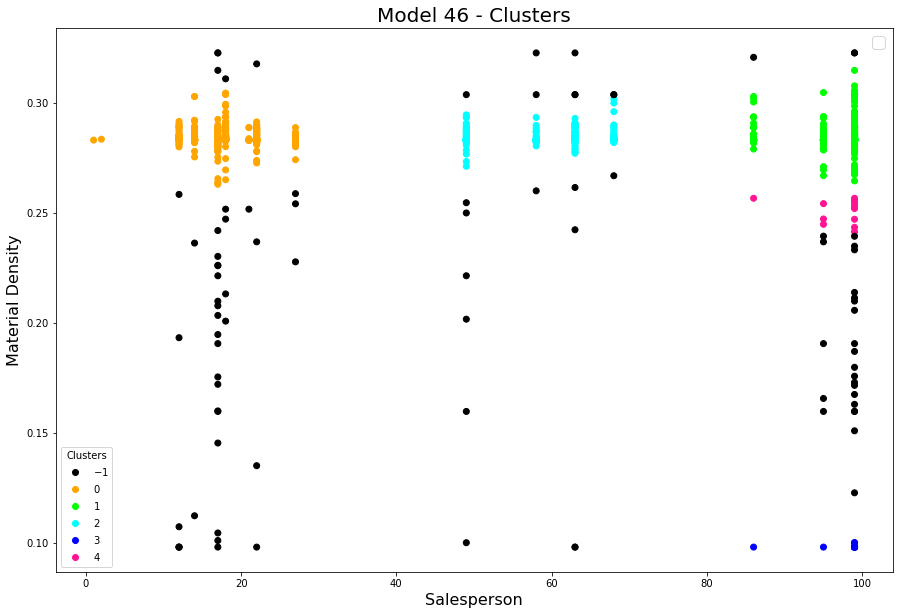

In [48]:
colors = ['#000000', '#ffa500', '#00ff00', '#00ffff', '#0000ff', '#ff1493']
cmap = ListedColormap(colors)

labels_data = pickle.loads(ast.literal_eval(combined_df['labels'].loc[46]))
features_str = combined_df['features'].loc[46]
features_list = ast.literal_eval(features_str)

df = final_df[features_list]

fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(df['Salesperson'], df['Material Density'], c=labels_data, cmap=cmap)

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

make_pretty(ax, title='Model 46 - Clusters', x_label='Salesperson', y_label='Material Density')

plt.show()

## Model 2 - 3 features

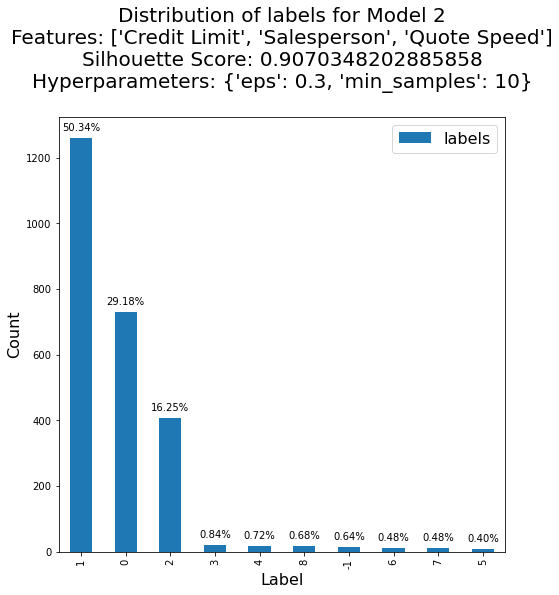

In [49]:
# Get data for Model 46
row_46 = combined_df.loc[2]
labels = pickle.loads(ast.literal_eval(row_46['labels']))
df = pd.DataFrame(columns=['labels'])
df['labels'] = labels

# Plot the data
plt.figure(figsize=(8, 8))
ax = df['labels'].value_counts().plot(kind='bar')
features = row_46['features']
silhouette_score = row_46['silhouette_score']
hyperparameters = row_46['hyperparameters']
make_pretty(ax, f'Distribution of labels for Model 2\nFeatures: {features}\nSilhouette Score: {silhouette_score}\nHyperparameters: {hyperparameters}\n', 'Label', 'Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height() / len(df) * 100:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

No handles with labels found to put in legend.


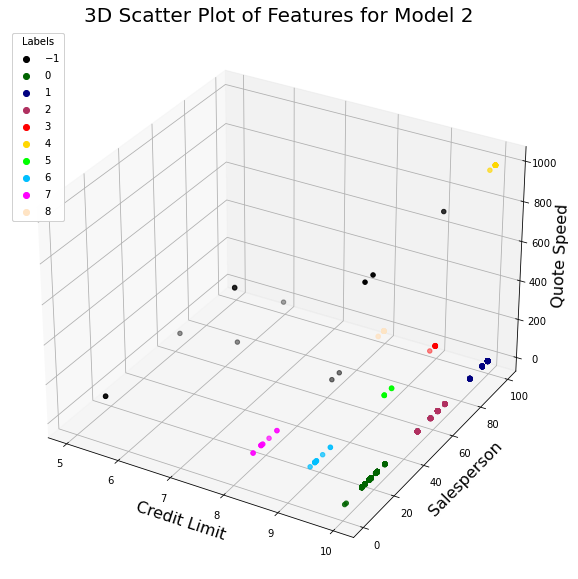

In [50]:
colors = ['#000000', '#006400', '#000080', '#b03060', '#ff0000', '#ffd700', '#00ff00', '#00bfff', '#ff00ff', '#ffe4c4']
cmap = ListedColormap(colors)

labels_data = pickle.loads(ast.literal_eval(combined_df['labels'].loc[2]))

features_str = combined_df['features'].loc[2]
features_list = ast.literal_eval(features_str)

df = final_df[features_list]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
make_pretty(ax, title='3D Scatter Plot of Features for Model 2')

scatter = ax.scatter(df['Credit Limit'], df['Salesperson'], df['Quote Speed'], c=labels_data, label=labels_data, cmap=cmap)

ax.set_xlabel(features_list[0])
ax.set_ylabel(features_list[1])
ax.set_zlabel(features_list[2], fontsize=16)

legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)

plt.show()


Cluster Distribution:
Cluster -1: 16 points
Cluster 0: 731 points
Cluster 1: 1261 points
Cluster 2: 407 points
Cluster 3: 21 points
Cluster 4: 18 points
Cluster 5: 10 points
Cluster 6: 12 points
Cluster 7: 12 points
Cluster 8: 17 points


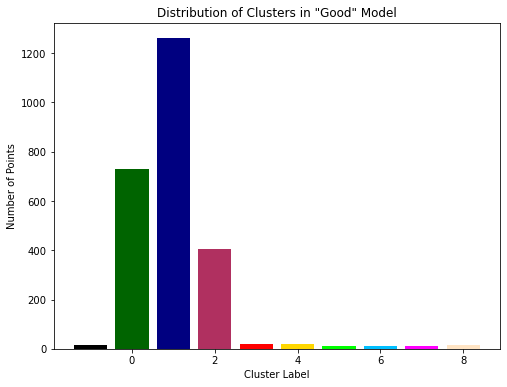

In [51]:
unique_labels, cluster_counts = np.unique(labels_data, return_counts=True)

# Print the distribution
print("Cluster Distribution:")
for label, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {label}: {count} points")

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, cluster_counts, color=colors)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Distribution of Clusters in "Good" Model')
plt.show()

In [52]:
labels_data = pickle.loads(ast.literal_eval(combined_df['labels'].loc[2]))

features_str = combined_df['features'].loc[2]
features_list = ast.literal_eval(features_str)

df = final_df[features_list]

# 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=df['Credit Limit'],
    y=df['Salesperson'],
    z=df['Quote Speed'],
    mode='markers',
    marker=dict(
        size=4,
        color=labels_data,
        colorscale=colors,
        opacity=0.8
    )
)])

fig.update_layout(
    scene=dict(
        xaxis_title=features_list[0],
        yaxis_title=features_list[1],
        zaxis_title=features_list[2],
    ),
    title='3D Scatter Plot of Features for Model 2'
)

# INTERACTIVE 3D PLOT
fig.show()

In [53]:
labels_data = pickle.loads(ast.literal_eval(combined_df['labels'].loc[2]))

features_str = combined_df['features'].loc[2]
features_list = ast.literal_eval(features_str)

df = final_df[features_list]

# Create separate traces for each label
traces = []
for label in set(labels_data):
    label_indices = [i for i, l in enumerate(labels_data) if l == label]
    trace = go.Scatter3d(
        x=df.iloc[label_indices]['Credit Limit'],
        y=df.iloc[label_indices]['Salesperson'],
        z=df.iloc[label_indices]['Quote Speed'],
        mode='markers',
        marker=dict(
            size=4,
            color=colors[label],  # Use color corresponding to each label
            opacity=0.8
        ),
        name=str(label)  # Name each trace with the label value
    )
    traces.append(trace)

# Create the figure
fig = go.Figure(data=traces)

fig.update_layout(
    scene=dict(
        xaxis_title=features_list[0],
        yaxis_title=features_list[1],
        zaxis_title=features_list[2],
    ),
    title='3D Scatter Plot of Features for Model 2'
)

# INTERACTIVE 3D PLOT
fig.show()

No handles with labels found to put in legend.


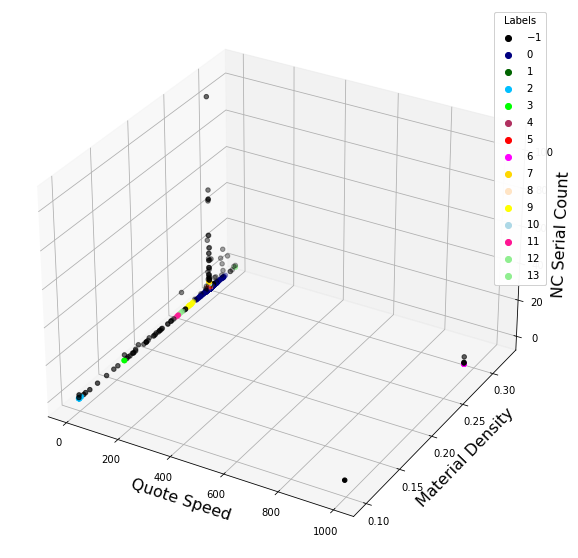

In [54]:
file_path_2 = "/home/arneyh/scotforgeproject1/results_csvs/"
df_2 = pd.read_csv(file_path_2 + "results_dbscan[0.1, 5].csv")
colors = ['#000000', '#000080', '#006400', '#00bfff', '#00ff00', '#b03060', '#ff0000', '#ff00ff', '#ffd700', '#ffe4c4', 
          '#ffff00', '#add8e6', '#ff1493', '#90ee90']
cmap = ListedColormap(colors)

labels_data = pickle.loads(ast.literal_eval(df_2['labels'].loc[55]))

features_str = df_2['features'].loc[55]
features_list = ast.literal_eval(features_str)

df = final_df[features_list]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
#make_pretty(ax, title='3D Scatter Plot of "Bad" Model')
make_pretty(ax, title='')


scatter = ax.scatter(df['Quote Speed'], df['Material Density'], df['NC Serial Count'], c=labels_data, label=labels_data, cmap=cmap)

ax.set_xlabel(features_list[0])
ax.set_ylabel(features_list[1])
ax.set_zlabel(features_list[2], fontsize=16)

legend1 = ax.legend(*scatter.legend_elements(), title="Labels")
ax.add_artist(legend1)

plt.show()


Cluster Distribution:
Cluster -1: 111 points
Cluster 0: 2158 points
Cluster 1: 34 points
Cluster 2: 22 points
Cluster 3: 5 points
Cluster 4: 75 points
Cluster 5: 7 points
Cluster 6: 16 points
Cluster 7: 12 points
Cluster 8: 24 points
Cluster 9: 17 points
Cluster 10: 9 points
Cluster 11: 5 points
Cluster 12: 5 points
Cluster 13: 5 points


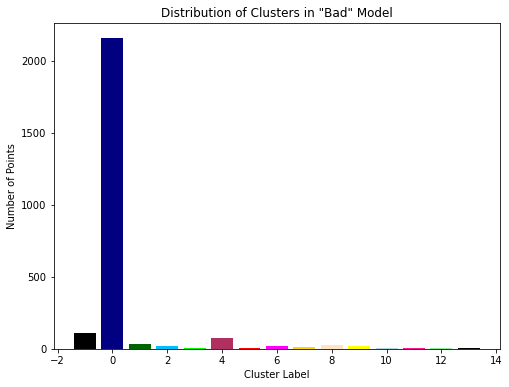

In [55]:
unique_labels, cluster_counts = np.unique(labels_data, return_counts=True)

# Print the distribution
print("Cluster Distribution:")
for label, count in zip(unique_labels, cluster_counts):
    print(f"Cluster {label}: {count} points")

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(unique_labels, cluster_counts, color=colors)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Points')
plt.title('Distribution of Clusters in "Bad" Model')
plt.show()